In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/dw_matrix'
/content


In [11]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [13]:
ls data

man_shoes.csv


In [14]:
df = pd.read_csv('data/man_shoes.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.shape

(18280, 48)

In [16]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [18]:
mean_price = np.mean(df.prices_amountmin)
mean_price

93.53952188183217

In [19]:
[1] * 5

[1, 1, 1, 1, 1]

In [0]:
y_true = df.prices_amountmin
y_pred = [mean_price] * y_true.shape[0]

In [23]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

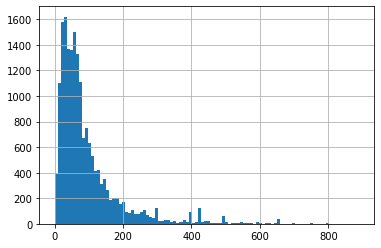

In [24]:
df.prices_amountmin.hist(bins=100)

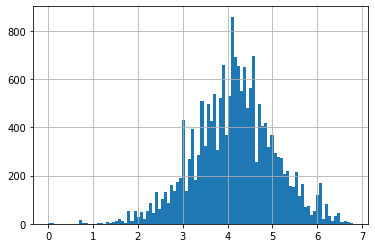

In [25]:
np.log(df.prices_amountmin + 1).hist(bins=100)

In [26]:
y_true = df.prices_amountmin
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [35]:
y_true = df.prices_amountmin
price_log_mean = np.exp(np.mean(np.log1p(y_true))) - 1 #np.mean(np.log1p(y_true))
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [34]:
np.exp(np.mean(np.log1p(y_true))) - 1

62.92811169273113

In [36]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df['brand_cat'] = df.brand.factorize()[0]
df['manufacturer_cat'] = df.manufacturer.factorize()[0]

In [47]:
feats = ['brand_cat']
X = df[feats].values
y = df.prices_amountmin.values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y , scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df.prices_amountmin.values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y , scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [50]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [52]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [53]:
run_model(['manufacturer_cat','brand_cat'])

(-58.539304199085976, 4.311223231615446)

In [54]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix'

In [0]:
!git add /matrix_one/day4.ipynb''